# Quantum Teleportation

# Exercise 1

# Bell state 만들기 - 얽힌 상태 구현

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit import Qubit, Clbit


def create_bell_pair(qr: QuantumRegister, cr: ClassicalRegister) -> QuantumCircuit:
    """Creates a bell pair between qubits a and b."""
    qc = QuantumCircuit(qr, cr)
    # unpack qubits
    # the first qubit is s but we won't be using it in this exercise
    s, a, b = qr

    # ENTER YOUR CODE BELOW EACH COMMENT
    # Put qubit a into state |+>
    qc.h(a)
    # CNOT with a as control and b as target
    qc.cx(a, b)
    # ENTER YOUR CODE ABOVE

    return qc  # For the grader

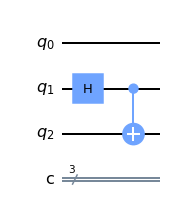

In [3]:
qr = QuantumRegister(3, name="q")
cr = ClassicalRegister(3, name="c")
qc = create_bell_pair(qr, cr)

qc.draw("mpl")

# Exercise 2

# 앨리스가 Bell basis로 측정하기 위해 basis 돌리기

In [5]:
def alice_gates(qr: QuantumRegister, cr: ClassicalRegister):
    """Creates Alices's gates"""
    qc = create_bell_pair(qr, cr)
    qc.barrier()  # Use barrier to separate steps
    s, a, b = qr

    # ENTER YOUR CODE BELOW EACH COMMENT
    # CNOT with source as control and a as target
    qc.cx(s, a)
    # Apply Hadamard on qubit s
    qc.h(s)
    # ENTER YOUR CODE ABOVE

    return qc  # For the grader

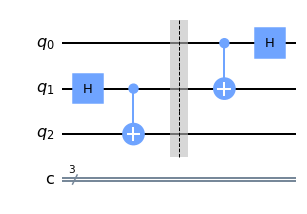

In [7]:
qc = alice_gates(qr, cr)
qc.draw("mpl")

# Exercise 3

# 앨리스가 Bell basis로 측정

In [9]:
def measure_and_send(qr: QuantumRegister, cr: ClassicalRegister):
    """Measures qubits a & s and 'sends' the results to Bob"""
    qc = alice_gates(qr, cr)
    qc.barrier()  # Use barrier to separate steps
    s, a, b = qr
    c0, c1, c2 = cr

    # ENTER YOUR CODE BELOW EACH COMMENT
    # Measure qubit a into classical bit 0
    qc.measure(a, c0)
    # Measure qubit s into classical bit 1
    qc.measure(s, c1)
    # ENTER YOUR CODE ABOVE

    return qc  # For the grader

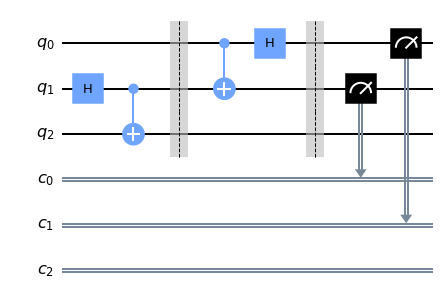

In [10]:
qc = measure_and_send(qr, cr)
qc.draw("mpl", cregbundle=False)

# Exercise 4

c0가 1 측정 -> $\psi^-$ or $\psi^+$ 측정된 것.

c1이 1 측정 -> $\phi^-$ or $\psi^-$ 측정된 것.

In [19]:
# This function takes a QuantumCircuit (qc), integer (qubit)
# and ClassicalRegisters (crz & crx) to decide which gates to apply
def bob_gates(qr: QuantumRegister, cr: ClassicalRegister):
    """Uses qc.if_test to control which gates are dynamically added"""
    qc = measure_and_send(qr, cr)
    qc.barrier()  # Use barrier to separate steps
    s, a, b = qr
    c0, c1, c2 = cr

    # ENTER YOUR CODE BELOW EACH COMMENT
    # Add an X gate to the qubit wire if c0 measures 1
    with qc.if_test((c0, 1)):
        qc.x(b)
    # Add a Z gate to the qubit wire if c1 measures 1
    with qc.if_test((c1, 1)):
        qc.z(b)
    # ENTER YOUR CODE ABOVE

    return qc  # For the grader

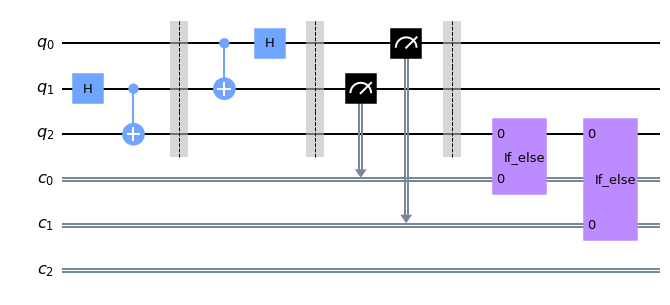

In [20]:
qc = bob_gates(qr, cr)
qc.draw("mpl", cregbundle=False)

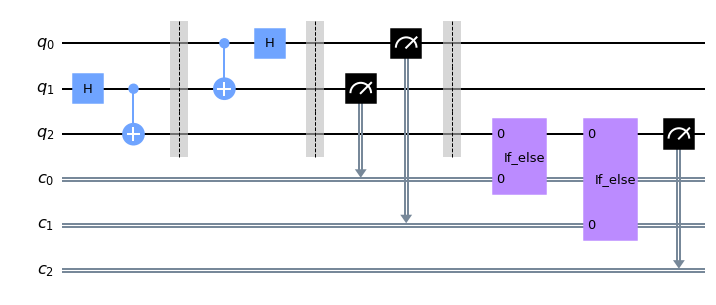

In [13]:
teleportation_circuit = bob_gates(qr, cr)
s, a, b = qr
c0, c1, c2 = cr
teleportation_circuit.measure(b, c2)
teleportation_circuit.draw("mpl")

# Excercise 5

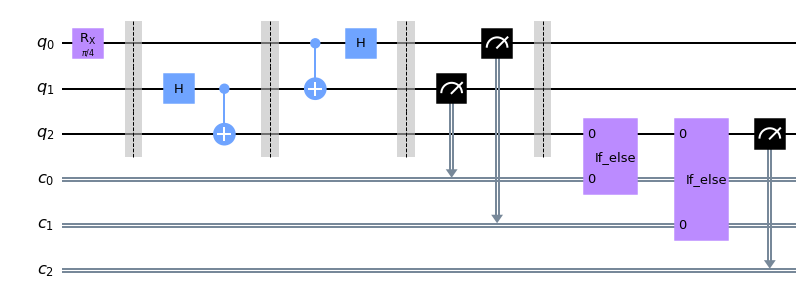

In [24]:
import math

teleport_superposition_circuit: QuantumCircuit

########## your code goes here #######

# Create a circuit that has the same structure as our teleportation circuit
state_prep = QuantumCircuit(qr, cr)

# Prepare the qubit
state_prep.rx(math.pi / 4, s)

# Put a barrier across all of the wires
state_prep.barrier()
# Add the teleportation circuit to the superposition circuit
teleport_superposition_circuit = state_prep.compose(teleportation_circuit)

teleport_superposition_circuit.draw("mpl", cregbundle=False)

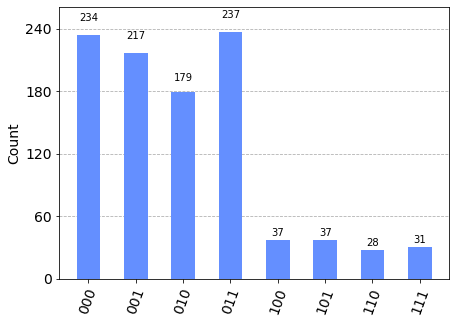

In [16]:
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

sim = AerSimulator()
transpiled_circuit = transpile(teleport_superposition_circuit, sim)

# run job
shots = 1000
job = sim.run(transpiled_circuit, shots=shots, dynamic=True)

# Get the results and display them
exp_result = job.result()
exp_counts = exp_result.get_counts()
plot_histogram(exp_counts)

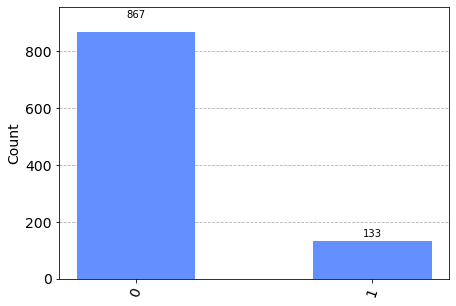

In [17]:
# trace out Bob's results on qubit 2
from qiskit.result import marginal_counts

bobs_counts = marginal_counts(exp_counts, [qr.index(b)])
plot_histogram(bobs_counts)